# Problem 1: Linear regression three ways

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

d = 20
theta_star = np.random.normal(0,1, size=(d,1))

In [2]:
def loss(X, y, theta):
    return np.mean((X @ theta - y)**2)

def train(n):
    """
    :param n: number of samples 
    :return: X, y, theta_hat theta_hat as (X^TX)^{-1}X^Ty
    """
    X = np.random.normal(0,1, size=(n,d))
    y = X @ theta_star + np.random.normal(0, 0.5, size=(n,1))
    theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return X, y, theta_hat

## 1(a)

In [3]:
X, y, theta_hat = train(2000)
print('train loss for theta_hat:', loss(X, y, theta_hat))
print('train loss for all zeros:', loss(X, y, np.zeros((d,1))))

train loss for theta_hat: 0.25311171890572937
train loss for all zeros: 22.373769819384957


## 1(b)

In [10]:
m = 100
X_test = np.random.normal(0,1, size=(m,d))

In [11]:
print('test loss for theta_hat:', loss(X_test, X_test @ theta_star, theta_hat))

test loss for theta_hat: 0.0024957553133085914


## 1(c)

In [41]:
distances = []
train_losses = []
test_losses = []

for n in [500, 1000, 1500, 2000]:
    X, y, theta_hat = train(n)
    print('n = ', n)
    print('distance between theta_hat and theta_star: ', np.linalg.norm(theta_hat - theta_star))
    print('training loss: ', loss(X, y, theta_hat))
    print('test loss: ', loss(X_test, X_test @ theta_star, theta_hat))
    distances.append(np.linalg.norm(theta_hat - theta_star))
    train_losses.append(loss(X, y, theta_hat))
    test_losses.append(loss(X_test, X_test @ theta_star, theta_hat))

n =  500
distance between theta_hat and theta_star:  0.09439975268993804
training loss:  0.26537108366786055
test loss:  0.00939826890084455
n =  1000
distance between theta_hat and theta_star:  0.07788921002714112
training loss:  0.2510904997312787
test loss:  0.006153837377547014
n =  1500
distance between theta_hat and theta_star:  0.05169931924939008
training loss:  0.2411902491940512
test loss:  0.0027425225657268077
n =  2000
distance between theta_hat and theta_star:  0.034704273089000356
training loss:  0.24217447119679517
test loss:  0.0011819614895469696


In [42]:
print('correlation between distance and training loss: ', np.corrcoef(distances, train_losses)[0,1])
print('correlation between distance and test loss: ', np.corrcoef(distances, test_losses)[0,1])

correlation between distance and training loss:  0.9172179177006032
correlation between distance and test loss:  0.9902548816097733


## 1(d)
with $L_i(\theta) = (\theta^T x_i - y_i)^2$, we know first that $\nabla \theta^T x_i - y_i = \theta$, so by chain rule we have $\nabla L_i(\theta) = 2(\theta^T x_i - y_i)x_i$. 
Thus, $\nabla L(\theta) = \sum_i 2(\theta^T x_i - y_i)x_i$. When $X = \begin{bmatrix} x_1^T \\ \vdots \\ x_n^T \end{bmatrix}$, this equals $\sum_i 2x_i x_i^T \theta - 2x_i y_i = 2X^TX\theta - 2X^Ty$.

In [45]:
def gradient(X, y, theta):
    return 2 * X.T @ X @ theta - 2 * X.T @ y

def gradient_descent(X, y, theta, alpha, num_iters):
    losses = []
    for i in range(num_iters):
        theta = theta - alpha * gradient(X, y, theta)
        losses.append(loss(X, y, theta))
    return theta, losses

0.2553571521402343
0.2553121669534184
2044280271821688.8


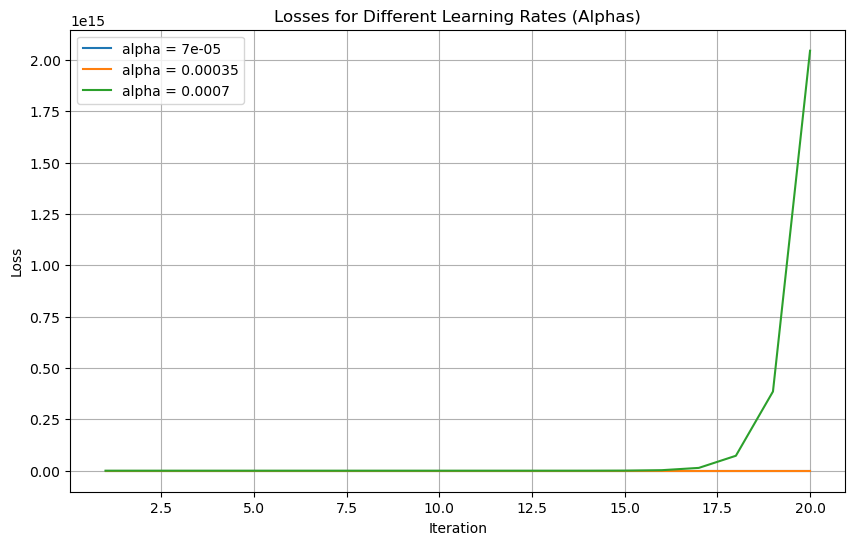

In [65]:
alphas = [0.00007, 0.00035, 0.0007]

losses_dict = {}

X, y, _ = train(2000)

for alpha in alphas:
    theta, losses = gradient_descent(X, y, np.zeros((d, 1)), alpha, 20)
    losses_dict[alpha] = losses
    print(losses[-1])

plt.figure(figsize=(10, 6))
for alpha, losses in losses_dict.items():
    plt.plot(range(1, 21), losses, label=f"alpha = {alpha}")

plt.title("Losses for Different Learning Rates (Alphas)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## 1(e)
Pseudocode for SGD is as follows.
1. Initialize $\theta$ to 0
2. For $t = 1, 2, \ldots, T$:
3. Sample $i$ uniformly at random from $\{1, \ldots, n\}$
4. $\theta = \theta - \alpha \nabla L_i(\theta)$
5. Return $\theta$

## 1(f)

In [12]:
def stochastic_gradient(X, y, theta):
    i = np.random.randint(0, X.shape[0])
    return 2 * X[i].reshape(-1,1) * (X[i] @ theta - y[i])

def stochastic_gradient_descent(X, y, theta, alpha, num_iters):
    losses = []
    for i in range(num_iters):
        theta = theta - alpha * stochastic_gradient(X, y, theta)
        losses.append(loss(X, y, theta))
    return theta, losses

0.2546832971038592
0.27944880142654344
0.31055811618385265


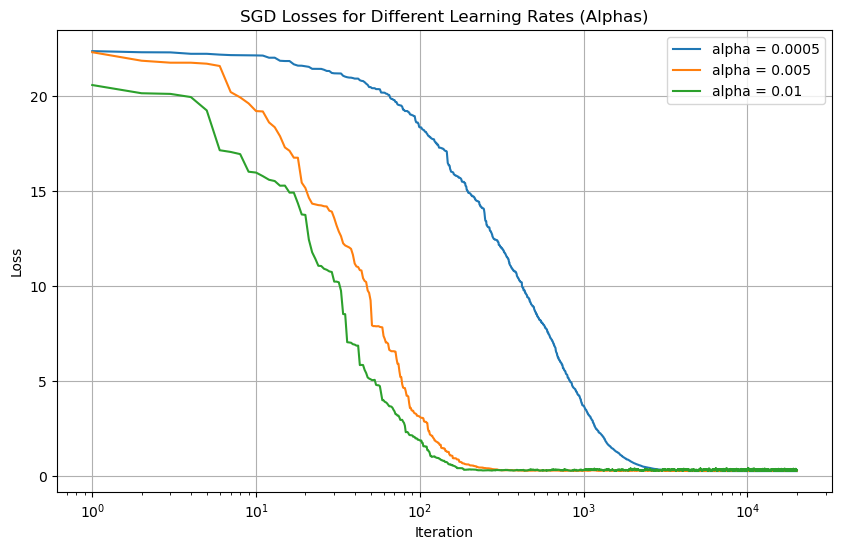

In [21]:
alphas = [0.0005, 0.005, 0.01]

losses_dict = {}
num_iters = 20000

for alpha in alphas:
    theta, losses = stochastic_gradient_descent(X, y, np.zeros((d, 1)), alpha, num_iters)
    losses_dict[alpha] = losses
    print(losses[-1])
    
plt.figure(figsize=(10, 6))
for alpha, losses in losses_dict.items():
    plt.plot(range(1, num_iters + 1), losses, label=f"alpha = {alpha}")

plt.title("SGD Losses for Different Learning Rates (Alphas)")
plt.xlabel("Iteration")
plt.xscale("log")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## 1(g)
My intuition is that if the gradient is large, this means that the minimum is very far away. So we should probably move even more than the small learning rate we have put. On the other hand, if the gradient is small, and we had the same constant learning rate, we would overstep the minimum, and the loss would increase. So I propose that we use a step size proportional to the size of $\nabla L_i(\theta)$, such as its absolute max coordinate (I would suspect that this is faster to compute than the norm of the gradient).

I have tried the following:
1. $\alpha_t = \frac{\alpha_0}{d} \max_{j} |\nabla L_i(\theta)|$
2. $\alpha_t = \frac{\alpha_0}{d} \|\nabla L_i(\theta)\|$
3. $\alpha_t = \frac{\alpha_0}{t}$


In [15]:
def sgd_with_max(X, y, theta, alpha, num_iters):
    losses = []
    for i in range(num_iters):
        gradient = stochastic_gradient(X, y, theta)
        max_coord = np.max(np.abs(gradient)) / gradient.shape[0]
        theta = theta - (alpha * max_coord) * gradient
        losses.append(loss(X, y, theta))
    return theta, losses

def sgd_with_norm_adjusted(X, y, theta, alpha, num_iters):
    losses = []
    for i in range(num_iters):
        gradient = stochastic_gradient(X, y, theta)
        norm = np.linalg.norm(gradient) / gradient.shape[0]
        theta = theta - (alpha * norm) * gradient
        losses.append(loss(X, y, theta))
    return theta, losses

def sgd_with_t(X, y,  theta, alpha, num_iters):
    losses = []
    for i in range(1, num_iters + 1):
        gradient = stochastic_gradient(X, y, theta)
        theta = theta - (alpha / i) * gradient
        losses.append(loss(X, y, theta))
    return theta, losses

0.25634680356940975
0.257187177742426
0.26084876000737656


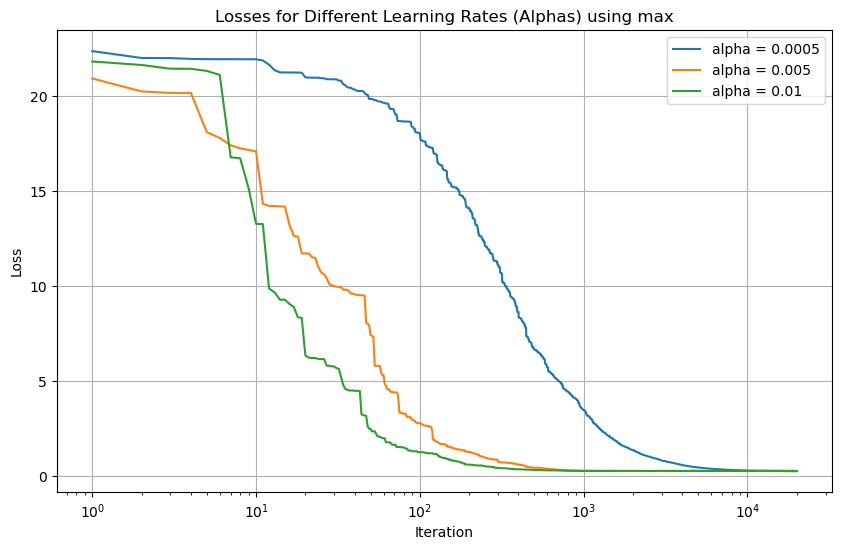

0.2550125651294993
0.26512733096447366
0.285990752303996


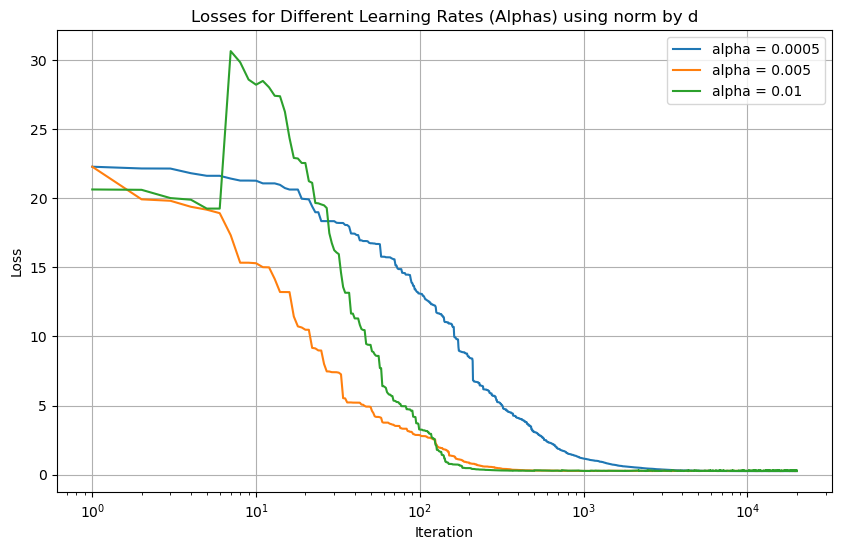

21.92961679107444
18.885203911659286
13.999088795033643


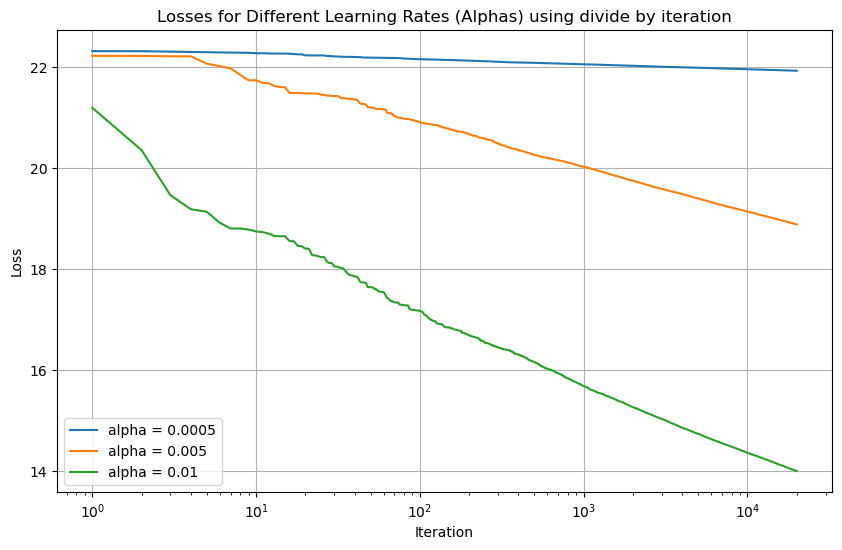

In [20]:
def sgd_test_with_fn(sgd_fn, name):
    alphas = [0.0005, 0.005, 0.01]

    losses_dict = {}

    num_iters = 20000

    for alpha in alphas:
        theta, losses = sgd_fn(X, y, np.zeros((d, 1)), alpha, num_iters)
        losses_dict[alpha] = losses
        print(losses[-1])

    plt.figure(figsize=(10, 6))
    for alpha, losses in losses_dict.items():
        plt.plot(range(1, num_iters + 1), losses, label=f"alpha = {alpha}")

    plt.title("Losses for Different Learning Rates (Alphas) using " + name)
    plt.xlabel("Iteration")
    plt.xscale("log")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

sgd_test_with_fn(sgd_with_max, "max")
sgd_test_with_fn(sgd_with_norm_adjusted, "norm by d")
sgd_test_with_fn(sgd_with_t, "divide by iteration")

# Problem 2: Regularization

## 2(a)

In [69]:
train_n = 200
test_n = 2000
d = 200
theta_star = np.random.normal(0, 1, size=(d,1))

def normalized_loss(X, y, theta):
    return np.linalg.norm(X @ theta - y) / np.linalg.norm(y)

In [70]:
test_losses = []
train_losses = []

for i in range(10):
    X_train = np.random.normal(0, 1, size=(train_n, d))
    theta_star = np.random.normal(0, 1, size=(d,1))
    y_train = X_train @ theta_star + np.random.normal(0, 0.5, size=(train_n, 1))
    X_test = np.random.normal(0,1, size=(test_n,d))
    y_test = X_test.dot(theta_star) + np.random.normal(0,0.5,size=(test_n,1))
    linreg_soln = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    train_losses.append(normalized_loss(X_train, y_train, linreg_soln))
    test_losses.append(normalized_loss(X_test, y_test, linreg_soln))
print('average train loss:', np.mean(train_losses))
print('average test loss:', np.mean(test_losses))

average train loss: 1.3665828700163064e-09
average test loss: 2.58306658381832


## 2(b)

In [71]:
def train_with_ridge(n, lamb):
    X = np.random.normal(0,1, size=(n,d))
    y = X @ theta_star + np.random.normal(0, 0.5, size=(n,1))
    theta_hat = np.linalg.inv(X.T @ X + lamb * np.eye(d)) @ X.T @ y
    return X, y, theta_hat

In [72]:
lambdas = [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]
overall_train_losses = []
overall_test_losses = []

for lamb in lambdas:
    test_losses_lamb = []
    train_losses_lamb = []
    for i in range(10):
        X_train, y_train, theta_hat = train_with_ridge(train_n, lamb)
        X_test = np.random.normal(0, 1, size=(test_n, d))
        y_test = X_test.dot(theta_star) + np.random.normal(0, 0.5, size=(test_n, 1))
        train_losses_lamb.append(normalized_loss(X_train, y_train, theta_hat))
        test_losses_lamb.append(normalized_loss(X_test, y_test, theta_hat))
    overall_train_losses.append(np.mean(train_losses_lamb))
    overall_test_losses.append(np.mean(test_losses_lamb))


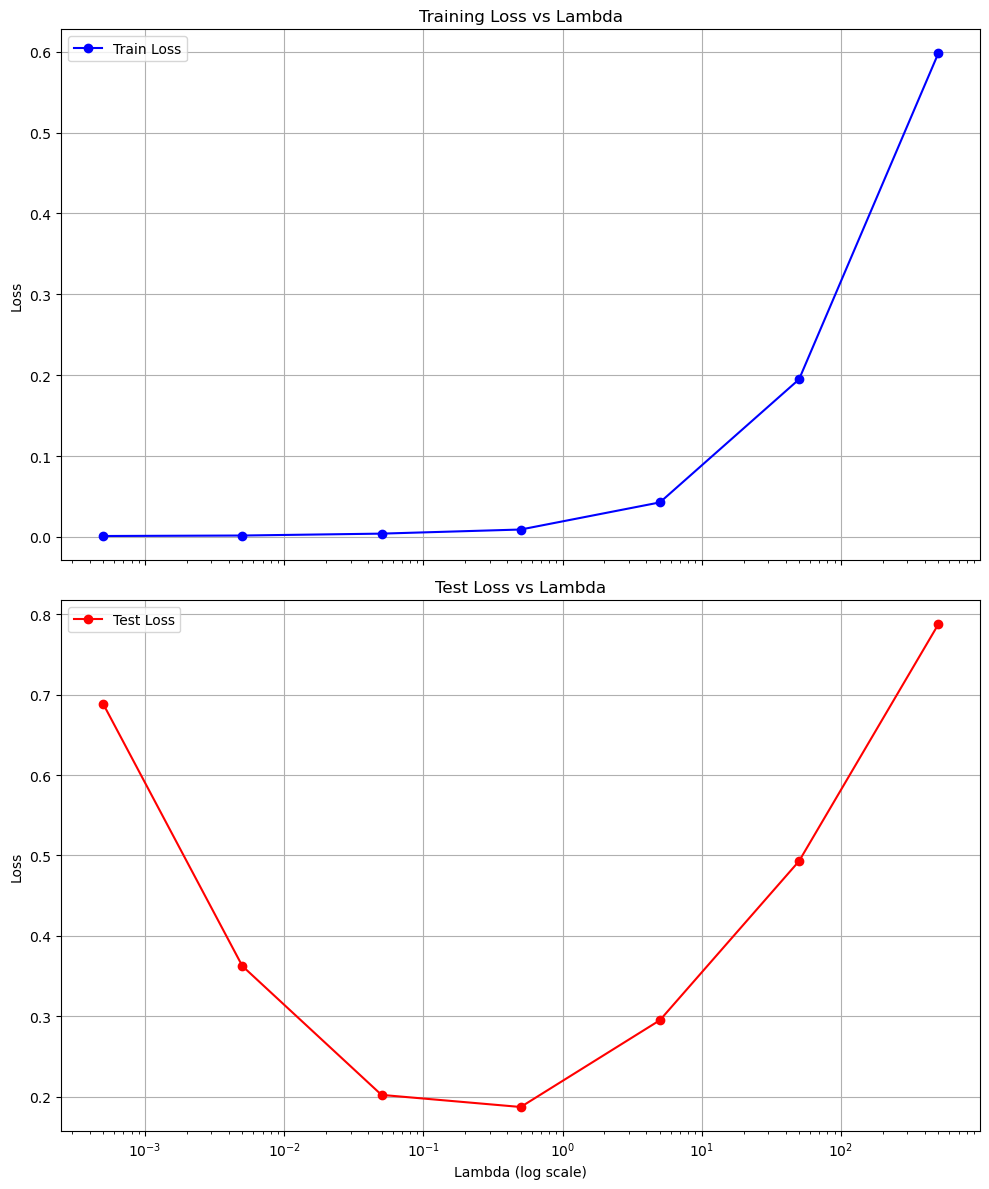

In [73]:
# Combine Training Loss and Test Loss into one figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Training Loss Plot
axs[0].plot(lambdas, overall_train_losses, marker='o', label='Train Loss', color='blue')
axs[0].set_xscale('log')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss vs Lambda')
axs[0].legend()
axs[0].grid()

# Test Loss Plot
axs[1].plot(lambdas, overall_test_losses, marker='o', label='Test Loss', color='red')
axs[1].set_xscale('log')
axs[1].set_xlabel('Lambda (log scale)')
axs[1].set_ylabel('Loss')
axs[1].set_title('Test Loss vs Lambda')
axs[1].legend()
axs[1].grid()

# Show combined subplots figure
plt.tight_layout()
plt.show()

## 2(c)

In [74]:
def train_with_sgd(n, alpha, num_iters):
    X = np.random.normal(0,1, size=(n,d))
    y = X @ theta_star + np.random.normal(0, 0.5, size=(n,1))
    theta = np.zeros((d,1))
    for i in range(num_iters):
        gradient = stochastic_gradient(X, y, theta)
        theta = theta - alpha * gradient
    return X, y, theta

In [75]:
alphas = [0.00005, 0.0005, 0.005]

for alpha in alphas:    
    test_losses = []
    train_losses = []
    for i in tqdm(range(10)):
        X_train, y_train, theta_hat = train_with_sgd(train_n, alpha, 1000000)
        X_test = np.random.normal(0,1, size=(test_n,d))
        y_test = X_test.dot(theta_star) + np.random.normal(0,0.5,size=(test_n,1))
        train_losses.append(normalized_loss(X_train, y_train, theta_hat))
        test_losses.append(normalized_loss(X_test, y_test, theta_hat))
    print('alpha:', alpha)
    print('average train loss:', np.mean(train_losses))
    print('average test loss:', np.mean(test_losses))

100%|██████████| 10/10 [00:51<00:00,  5.15s/it]


alpha: 5e-05
average train loss: 0.011713188988309937
average test loss: 0.22012722477222724


100%|██████████| 10/10 [00:48<00:00,  4.89s/it]


alpha: 0.0005
average train loss: 0.003993152160998941
average test loss: 0.19977113409950595


100%|██████████| 10/10 [00:48<00:00,  4.88s/it]

alpha: 0.005
average train loss: inf
average test loss: inf


2(d)


In [76]:
alphas_that_work = [0.00005, 0.0005]

train_losses_dict = {}
test_losses_dict = {}
l2_norms_dict = {}

for alpha in tqdm(alphas_that_work):
    train_losses = []
    test_losses = []
    l2_norms = []
    X = np.random.normal(0,1, size=(train_n,d))
    y = X @ theta_star + np.random.normal(0, 0.5, size=(train_n,1))
    X_test = np.random.normal(0,1, size=(test_n,d))
    y_test = X_test.dot(theta_star) + np.random.normal(0,0.5,size=(test_n,1))
    theta_hat = np.zeros((d,1))
    for i in range(1000000):
        gradient = stochastic_gradient(X, y, theta_hat)
        theta_hat = theta_hat - alpha * gradient
        train_losses.append(normalized_loss(X, y, theta_hat))
        l2_norms.append(np.linalg.norm(theta_hat - theta_star))
        test_losses.append(normalized_loss(X_test, y_test, theta_hat))
    train_losses_dict[alpha] = train_losses
    test_losses_dict[alpha] = test_losses
    l2_norms_dict[alpha] = l2_norms

100%|██████████| 2/2 [02:28<00:00, 74.42s/it]


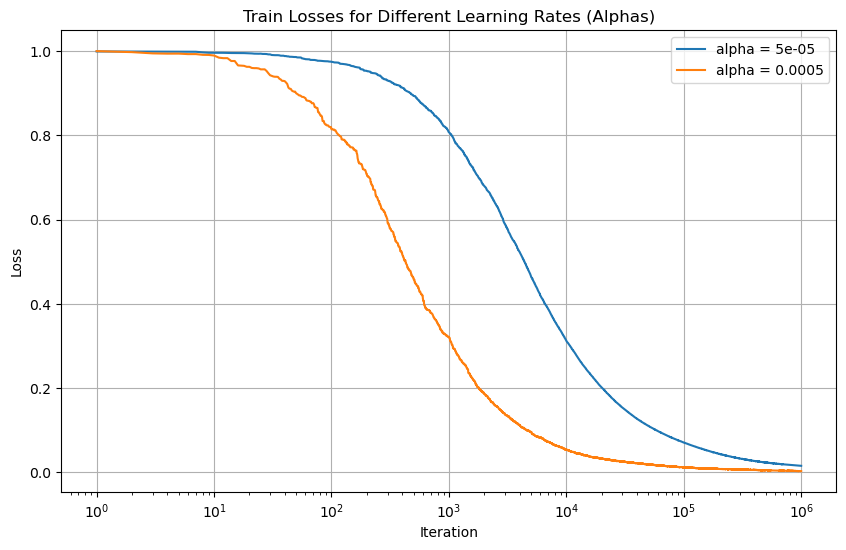

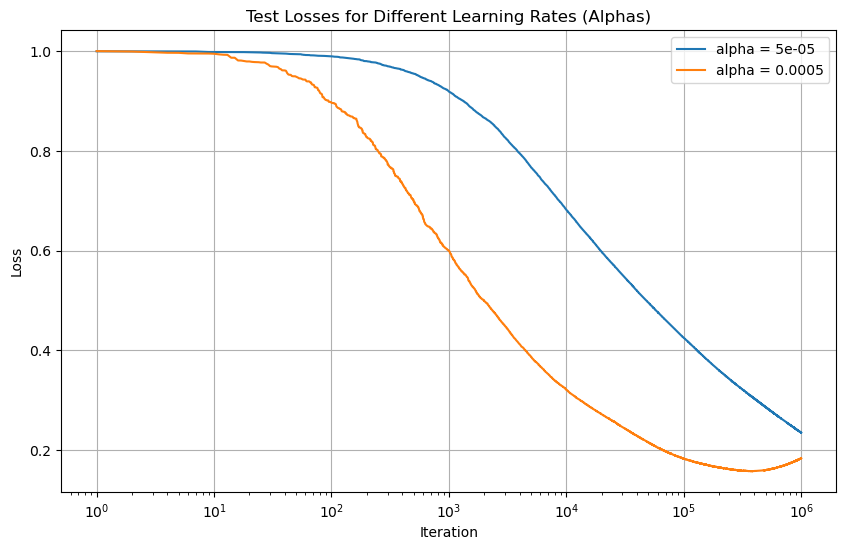

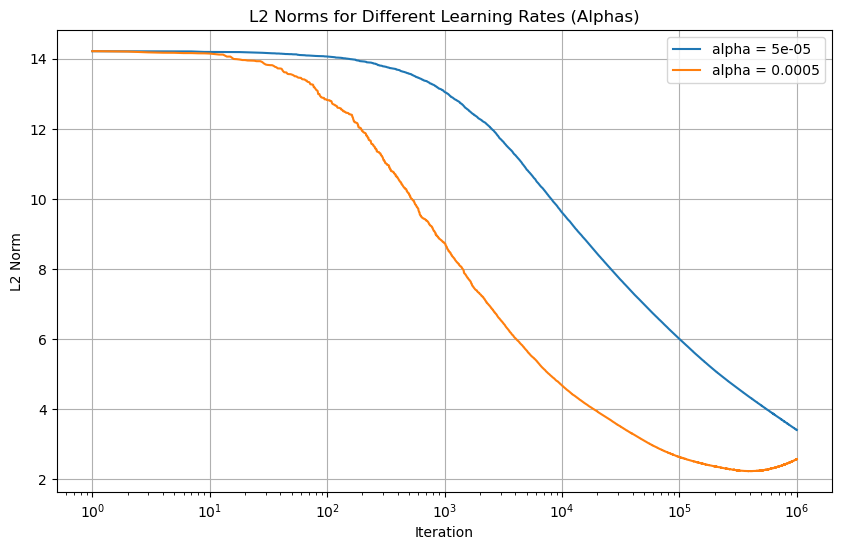

In [80]:
plt.figure(figsize=(10, 6))
for alpha, losses in train_losses_dict.items():
    plt.plot(range(1, 1000000 + 1), losses, label=f"alpha = {alpha}")

plt.title("Train Losses for Different Learning Rates (Alphas)")
plt.xlabel("Iteration")
plt.xscale('log')
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for alpha, losses in test_losses_dict.items():
    plt.plot(range(1, 1000000 + 1), losses, label=f"alpha = {alpha}")

plt.title("Test Losses for Different Learning Rates (Alphas)")
plt.xlabel("Iteration")
plt.xscale('log')
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for alpha, norms in l2_norms_dict.items():
    plt.plot(range(1, 1000000 + 1), norms, label=f"alpha = {alpha}")

plt.title("L2 Norms for Different Learning Rates (Alphas)")
plt.xlabel("Iteration")
plt.xscale('log')
plt.ylabel("L2 Norm")
plt.legend()
plt.grid()
plt.show()

# Problem 3: Try Anything

In [43]:
def sgd_with_max_reg(X, y, theta, alpha, lamb, num_iters):
    losses = []
    for i in range(num_iters):
        gradient = stochastic_gradient(X, y, theta) + 2 * lamb * theta
        max_coord = np.max(np.abs(gradient)) / gradient.shape[0]
        theta = theta - (alpha * max_coord) * gradient
        losses.append(loss(X, y, theta))
    return theta, losses

In [63]:
def train_with_sgd_max_reg(n, alpha, lamb):
    X = np.random.normal(0,1, size=(n,d))
    y = X @ theta_star + np.random.normal(0, 0.5, size=(n,1))
    theta = np.zeros((d,1))
    theta, _ = sgd_with_max_reg(X, y, theta, alpha, lamb, 100000)
    return X, y, theta

In [61]:
d = 300
test_n = 2000
theta_star = np.random.normal(0, 1, size=(d,1))

In [64]:
lambdas = [0.0005, 0.005, 0.05, 0.5, 5]
alphas = [0.00005, 0.0005, 0.005]
best_test_loss = np.inf
best_lamb = 0
best_alpha = 0

for lamb in lambdas:
    for alpha in alphas:
        test_losses = []
        train_losses = []
        for i in range(10):
            X_train, y_train, theta_hat = train_with_sgd_max_reg(200, alpha, lamb)
            X_test = np.random.normal(0,1, size=(test_n,d))
            y_test = X_test.dot(theta_star) + np.random.normal(0,0.5,size=(test_n,1))
            train_losses.append(normalized_loss(X_train, y_train, theta_hat))
            test_losses.append(normalized_loss(X_test, y_test, theta_hat))
        if np.mean(test_losses) < best_test_loss:
            best_test_loss = np.mean(test_losses)
            best_lamb = lamb
            best_alpha = alpha
            print('average train loss:', np.mean(train_losses))
            print('new best average test loss: ', np.mean(test_losses))

print(f'best lambda: {best_lamb}')
print(f'best alpha: {best_alpha}')

average train loss: 0.19457294422815397
new best average test loss:  0.6579197467714661
average train loss: 0.06089665387516149
new best average test loss:  0.5973129985058507


/tmp/ipykernel_2965/1768204018.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((X @ theta - y)**2)
/tmp/ipykernel_2965/3516994230.py:6: RuntimeWarning: overflow encountered in multiply
  theta = theta - (alpha * max_coord) * gradient
/tmp/ipykernel_2965/1768204018.py:2: RuntimeWarning: invalid value encountered in matmul
  return np.mean((X @ theta - y)**2)
/tmp/ipykernel_2965/473524405.py:3: RuntimeWarning: invalid value encountered in matmul
  return 2 * X[i].reshape(-1,1) * (X[i] @ theta - y[i])


average train loss: 0.07226665890624548
new best average test loss:  0.592696195064302
best lambda: 0.05
best alpha: 0.0005
